In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets 
  
# metadata 
print(dry_bean.metadata) 
  
# variable information 
print(dry_bean.variables) 


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [2]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [3]:
y

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
l= LabelEncoder()
y=l.fit_transform(y)
y

c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5, 5, 5, ..., 3, 3, 3])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
y_train.shape

(10888,)

In [8]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [9]:
pred=clf.predict(X_test)
pred

array([5, 0, 5, ..., 3, 2, 3])

In [10]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, pred)
print('The accuracy of Chambal model is: ', acc)

The accuracy of Chambal model is:  0.8927653323540213


In [11]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [28]:
from sklearn.metrics import classification_report
#target_names=['SEKER', 'ODERMASON','A', 'B', 'C','D','E']
print(classification_report(y_test, pred ))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       261
           1       1.00      1.00      1.00       117
           2       0.89      0.91      0.90       317
           3       0.88      0.88      0.88       671
           4       0.95      0.93      0.94       408
           5       0.94      0.91      0.93       413
           6       0.83      0.83      0.83       536

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723



<BarContainer object of 13611 artists>

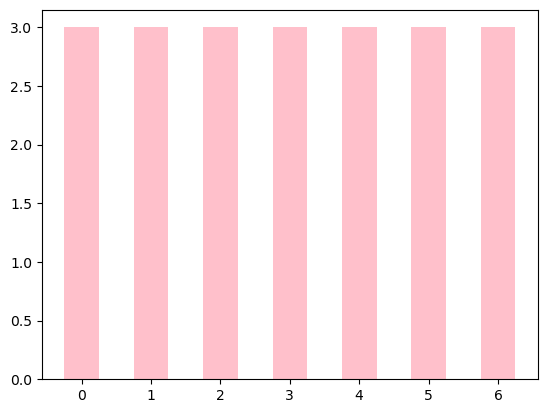

In [13]:
import matplotlib.pyplot as plt
plt.bar(y, height=3, width=0.5, color='pink', alpha=0.9)


<BarContainer object of 2723 artists>

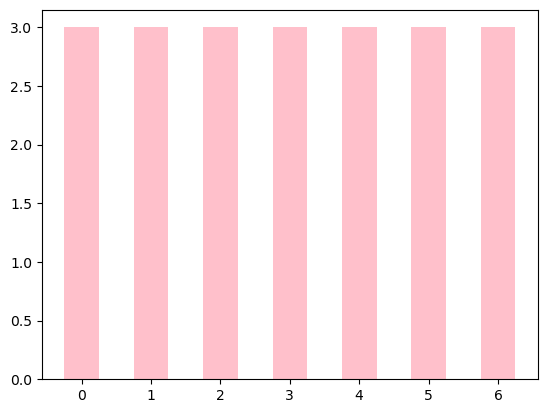

In [14]:
plt.bar(y_test, height=3, width=0.5, color='pink')
#plt.plot(y_test)

In [15]:
import pandas as pd

c=X.corr()
c



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRatio,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


<Axes: >

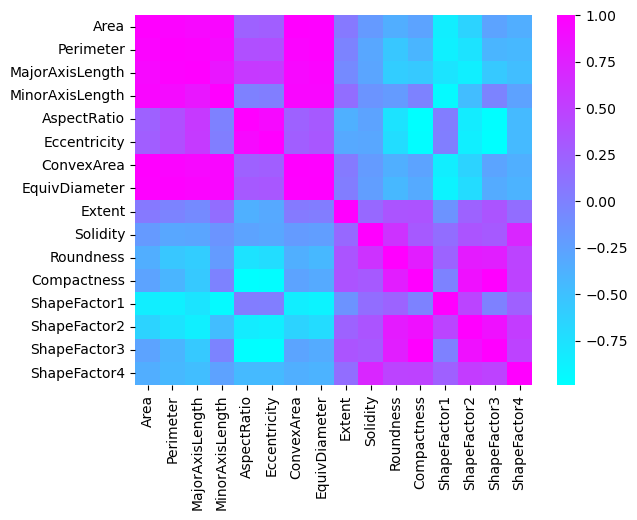

In [16]:
import seaborn as sb
sb.heatmap(c,cmap='cool')

In [17]:
from sklearn import svm
s=svm.SVC(decision_function_shape='ovo', C=1)
s.fit(X_train, y_train)

SVC(C=1, decision_function_shape='ovo')

In [18]:
pred1=s.predict(X_test)
pred1

array([6, 2, 5, ..., 3, 2, 5])

In [19]:
acc2=accuracy_score(y_test, pred1)
print('The accuraccy of Chambal_2.0 model is :', acc2)

The accuraccy of Chambal_2.0 model is : 0.6312890194638267


In [20]:
target_names=['SEKER', 'ODERMASON','A', 'B', 'C','D','E']
print(classification_report(y_test,pred1, target_names=target_names))

              precision    recall  f1-score   support

       SEKER       0.48      0.08      0.14       261
   ODERMASON       1.00      1.00      1.00       117
           A       0.60      0.90      0.72       317
           B       0.74      0.83      0.78       671
           C       0.63      0.59      0.61       408
           D       0.40      0.26      0.31       413
           E       0.57      0.74      0.64       536

    accuracy                           0.63      2723
   macro avg       0.63      0.63      0.60      2723
weighted avg       0.61      0.63      0.60      2723



<BarContainer object of 13611 artists>

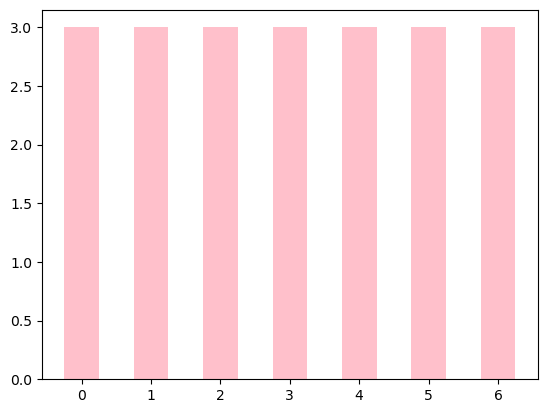

In [21]:
plt.bar(y, height=3,width=0.5,color='pink', alpha=0.9)

In [22]:
from sklearn.metrics import confusion_matrix as cm
cm=cm(y_test, pred1,labels=[0,1,2,3,4,5,6])
cm


array([[ 21,   0, 170,   0,  60,   0,  10],
       [  0, 117,   0,   0,   0,   0,   0],
       [  9,   0, 284,   0,  24,   0,   0],
       [  0,   0,   0, 556,   0,  85,  30],
       [ 14,   0,  22,  10, 240,   9, 113],
       [  0,   0,   0, 151,  11, 106, 145],
       [  0,   0,   0,  30,  46,  65, 395]], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix as cm
cm=cm(y_test, pred,labels=[0,1,2,3,4,5,6])
cm

array([[228,   0,  23,   0,   1,   1,   8],
       [  0, 117,   0,   0,   0,   0,   0],
       [ 23,   0, 288,   0,   4,   0,   2],
       [  1,   0,   0, 593,   4,  11,  62],
       [  3,   0,  11,   3, 381,   0,  10],
       [  2,   0,   0,  22,   0, 377,  12],
       [  8,   0,   2,  55,  11,  13, 447]], dtype=int64)

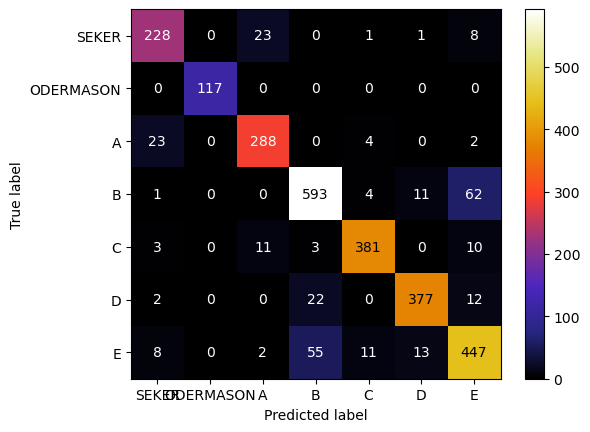

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels=['SEKER', 'ODERMASON','A', 'B', 'C','D','E']
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='CMRmap')

In [25]:
#color=np.arange(2723)
#plt.scatter(pred,pred1,s=70, alpha=0.9,  c=color,cmap='nipy_spectral' )  


In [26]:
#plt.bar(pred,pred1, color='cyan', width=0.7, alpha=0.9)


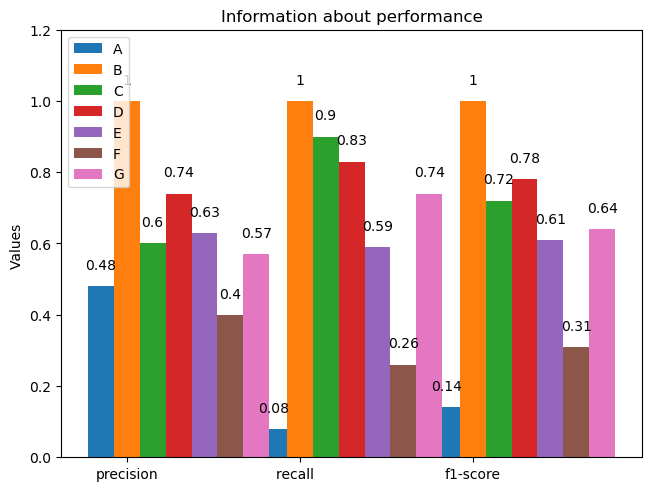

In [27]:

list = ("precision", "recall  ", "f1-score" )
dict1 = {
    'A': (0.48,0.08,0.14),
    'B': (1.00   ,   1.00   ,   1.00      ),
    'C': (0.60    ,  0.90    ,  0.72      ),
    'D': ( 0.74   ,   0.83    ,  0.78      ),
    'E': (0.63   ,   0.59   ,   0.61    ), 
    'F':(0.40   ,   0.26   ,   0.31   ),
    'G':(0.57   ,   0.74   ,   0.64     ), 

    }

x = np.arange(len(list))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in dict1.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=10)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values ')
ax.set_title('Information about performance')
ax.set_xticks(x + width, list)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 1.2)

plt.show()